# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.9564,  0.4041,  0.0845,  0.6331,  0.2315,  0.9989,  0.1074,  0.1117,  0.6955,  0.5966,
        0.0988,  0.3934,  0.0933,  0.3071,  0.6119,  0.5565,  0.0224,  0.2752,  0.2827,  0.3801,
        0.0653,  0.3732,  0.8516,  0.6849,  0.3696,  0.6587,  0.6361,  0.3128,  0.1117,  0.3667])

In [6]:
y

array([ 10.8693,   9.2124,   8.2536,   9.8992,   8.6945,  10.9968,   8.3221,   8.335 ,  10.0866,
         9.7899,   8.2963,   9.1802,   8.28  ,   8.9213,   9.8357,   9.6696,   8.0672,   8.8255,
         8.8482,   9.1402,   8.1958,   9.1196,  10.5549,  10.0547,   9.1089,   9.9762,   9.9082,
         8.9383,   8.3352,   9.1002])

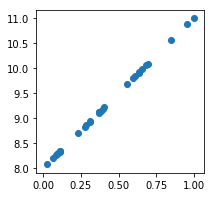

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [27]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.7036

In [28]:
lr=0.05
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [29]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [30]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(50): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

In [31]:
a_guess

3.0000

In [32]:
b_guess

8.0000

In [ ]:
x